In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.kernel_approximation import RBFSampler, Nystroem

#other
from math import sqrt

import eli5

from yellowbrick.features import Rank2D

from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC

from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE,SVMSMOTE,ADASYN, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

### project b
DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

#data.fillna(method = "ffill", inplace = True)
# data.interpolate(method="linear",inplace = True)
#imr = KNNImputer(missing_values = np.nan)
imr = IterativeImputer(random_state=42, max_iter=100, min_value=data['Income'].min())
imr = imr.fit(data[['Income']])
data['Income'] = imr.transform(data[['Income']]).ravel()
# iter_imp = IterativeImputer(random_state= 42)
# data["Income"] = iter_imp.fit_transform(data["Income"])
print(data.isnull().values.any())

label_encoder = LabelEncoder()
enc = OneHotEncoder()
data["Education"] = label_encoder.fit_transform(data["Education"])
print(label_encoder.classes_)
# enc_df = pd.DataFrame(enc.fit_transform(data[["Marital_Status"]]).toarray())
# print(enc.get_feature_names())
# data = data.join(enc_df)
oversampler = RandomOverSampler(sampling_strategy=0.5)
undersampler = RandomUnderSampler(sampling_strategy='majority')
# powerTransform = PowerTransformer(method='yeo-johnson', standardize=True)

# dataTransformer = Pipeline([('oversampler',oversampler),('undersampler',undersampler),('QuantileTransformer',QuantileTransformer())])


# data = data[(np.abs(stats.zscore(data[['Income']])) < 3)]

data = pd.concat([data, pd.get_dummies(data["Marital_Status"],prefix="Marital")], axis=1)

# data['enroll_year'] = pd.DatetimeIndex(data.Dt_Customer).year
# data['enroll_month'] = pd.DatetimeIndex(data.Dt_Customer).month
# data['enroll_day'] = pd.DatetimeIndex(data.Dt_Customer).day

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','enroll_day','enroll_month','enroll_year']

y = data.Response
X = data.drop(['Response'], axis=1)

# polynomial_features= PolynomialFeatures(degree=2)
# testX = polynomial_features.fit_transform(X)


False
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


In [19]:
smoteX

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Marital_Absurd,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO
0,1957,2,58138.000000,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,1954,2,46344.000000,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,1965,2,71613.000000,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,1984,2,26646.000000,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,1981,4,58293.000000,1,0,94,173,43,118,46,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,1959,1,82336.705642,0,0,73,744,57,929,98,...,0,0,0,0,0,0,0,0,0,0
3808,1972,4,38293.898523,0,0,66,124,41,90,72,...,0,0,0,0,0,1,0,0,0,0
3809,1985,2,64508.409527,0,0,26,853,167,526,23,...,0,0,0,0,0,0,0,0,0,0
3810,1972,3,34597.861224,1,0,29,100,15,28,3,...,0,0,0,0,0,0,0,0,0,0


In [20]:
oversample = SMOTE()
smoteX, smotey = oversample.fit_resample(X, y)
sX_train, sX_test, sy_train, sy_test = train_test_split(smoteX, smotey, random_state=42, test_size = 0.30, shuffle = True, stratify = smotey)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30, shuffle = True, stratify = y)
X_train,y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test =  oversample.fit_resample(X_test, y_test)

In [3]:
first_bracket = 1
second_bracket =  2
third_bracket = 3
data['SalaryRange'] = pd.cut(data['Income'], bins=[15000, 60000, 110000, 300000], labels=[first_bracket, second_bracket, third_bracket])
data = data[data.columns.difference(['Income'])];

In [5]:
data['SalaryRange'].convert_dtypes(convert_integer=True)

AttributeError: 'Series' object has no attribute 'convert_dtypes'

In [43]:
y_train.tail()

2663    1
2664    1
2665    1
2666    1
2667    1
Name: Response, dtype: int64

In [42]:
sy_train.sort_index().tail()

3803    1
3804    1
3805    1
3807    1
3808    1
Name: Response, dtype: int64

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
def test_model(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['yes','no']))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         yes       0.94      0.94      0.94       572
          no       0.94      0.94      0.94       572

    accuracy                           0.94      1144
   macro avg       0.94      0.94      0.94      1144
weighted avg       0.94      0.94      0.94      1144



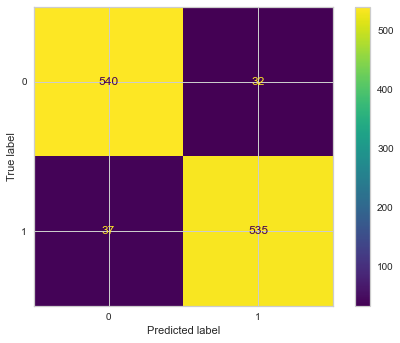

In [44]:
#Performance of apply smote then stratify

abc = XGBClassifier()
test_model(abc,sX_train, sX_test, sy_train, sy_test)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         yes       0.82      0.95      0.88       572
          no       0.94      0.79      0.86       572

    accuracy                           0.87      1144
   macro avg       0.88      0.87      0.87      1144
weighted avg       0.88      0.87      0.87      1144



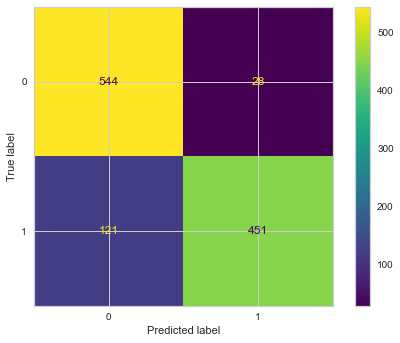

In [45]:
#Performance of apply stratify then sampling
X_train, X_test, y_train, y_test
test_model(abc,X_train, X_test, y_train, y_test)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30, shuffle = True, stratify = y)

y.value_counts()

# pca = PCA(.95,whiten=True)
# pca.fit(X_train)
# X_Xtrain = pca.transform(X_train)
# X_Xtest = pca.transform(X_test)


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


X_train_cont = X_train.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)
X_test_cont = X_test.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)

X_cont_column = X_train_cont.columns
pcaX_train = X_train_cont
pcaX_test = X_test_cont


def pca_scatter_plot():
	visualizer = pca_decomposition(X_train_cont, y_train, scale=True, classes=['no','yes'])
	visualizer.show()
# combine = SMOTEENN()
pca_scatter_plot()

# X_train, y_train = combine.fit_resample(X_train, y_train)

# 'majority': resample only the majority class;

# 'not minority': resample all classes but the minority class;

# 'not majority': resample all classes but the majority class;

# 'all': resample all classes;

# 'auto': equivalent to 'not minority'.




# nystroem eliminate feature then use nystroem
# feature_map_nystroem = Nystroem(kernel = 'linear', n_components=500)
# X_train = feature_map_nystroem.fit_transform(X_train)
# X_test = feature_map_nystroem.transform(X_test)

# same with nystroem need  investigate
# rbf_sampler = RBFSampler(gamma = 5.0,n_components=100)
# X_train = rbf_sampler.fit_transform(X_train)
# X_test = rbf_sampler.transform(X_test)

# visualizer = Rank2D(
#     features=X.columns, algorithm='covariance'
# )
# visualizer.fit(X, y)                # Fit the data to the visualizer
# visualizer.transform(X)             # Transform the data
# visualizer.show()                   # Finalize and render the figure
# plt.figure(figsize=(3,3))

# visualizer = PCA_YB(proj_features=True)
# visualizer.fit_transform(X, y)
# visualizer.show()

# visualizer = RadViz()
# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.show()

# visualizer = pca_decomposition(
#     X, y, scale=True, classes=[]
# )
# visualizer.show()


# models = [
# 	#Lasso(),
# 	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
# 	LinearSVC(), 
# 	GaussianProcessClassifier(),
# 	ExtraTreeClassifier(),
# 	BernoulliNB(),
# 	LogisticRegressionCV(max_iter= 1200), 
# 	RidgeClassifierCV(),
# 	SVC(kernel = 'linear',max_iter= -1), 
# 	Perceptron(),
# 	PassiveAggressiveClassifier(), 
# 	DecisionTreeClassifier(), #no coef 
# 	KNeighborsClassifier(),#no feat_import, use permutation_importance 
# 	GaussianNB(), #no feat_import, use permutation_importance 
# 	LGBMClassifier(),#no coef 
# 	RandomForestClassifier(), #no coef 
# 	GradientBoostingClassifier(),#no coef 
# 	PassiveAggressiveClassifier(), 
# 	ExtraTreesClassifier(), #no coef 
# 	XGBClassifier(),
# 	AdaBoostClassifier(), #no coef 
# 	]

# classes = ["no", "yes"]
# for model in models:
# 	#print(model.__class__.__name__)
# 	#cross_validate(model,KFold())
# 	visualizer = ClassificationReport(model, classes=classes, support=True)
# 	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
# 	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# 	visualizer.show()
# 	# visualizer = ROCAUC(model, classes=classes)
# 	# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# 	# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# 	# visualizer.show()
# 	viz = PrecisionRecallCurve(
#     model
# 	)
# 	viz.fit(X_train, y_train)
# 	viz.score(X_test, y_test)
# 	viz.show()


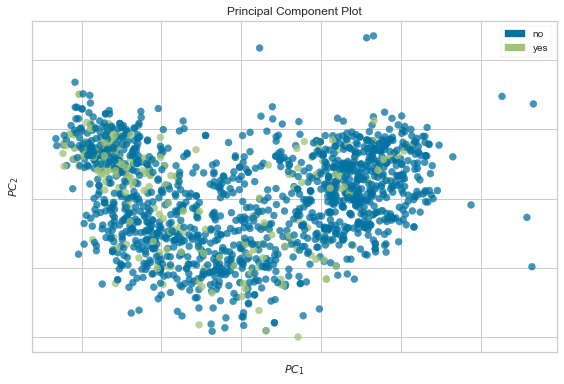

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [9]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
xtrain_log_transformed = transformer.transform(X_train_cont)
visualizer = pca_decomposition(xtrain_log_transformed, y_train, scale=True, classes=['no','yes'])
visualizer.show()

